In [1]:
import sys
!{sys.executable} -m pip install sklearn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Load data from .txt files and make the train-test splits.
# Since we're working with text data, we need to vectorize the documents / turn each document
# into a point vector in a n-dimentions space. 
# Moreover, rather than simply using the word counts, we want to use the Term Frequency as feature value.

# dataset = load_files('./cleaned_op_spam', encoding='latin-1')
dataset = load_files('./genuine_vs_fake', encoding='utf-8')
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

custom_stop_words = text.ENGLISH_STOP_WORDS.union(["\n"])
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, min_df=1)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)
x_train_vec
# print(x_trainvec.toarray())
print(vectorizer.get_feature_names_out())

print('===== Target classes =====')
print(dataset.target_names)
# print(dataset)

['00' '000' '00a' ... 'zest' 'zone' 'zoo']
===== Target classes =====
['fake', 'genuine']


In [3]:
length_features = []
for poop in range(1,26):
    vectorizer = TfidfVectorizer(stop_words=custom_stop_words, min_df=poop, ngram_range=(1, 1))
    all = vectorizer.fit_transform(dataset.data)
    length = len(vectorizer.get_feature_names_out())
    length_features.append(length)
print(length_features)

[6771, 3419, 2466, 1904, 1576, 1346, 1206, 1081, 984, 895, 817, 760, 696, 646, 615, 591, 555, 523, 489, 464, 438, 419, 400, 381, 363]


In [4]:
custom_params = {'figure.figsize':(12,7)}
sns.set_theme(style="whitegrid", rc=custom_params)

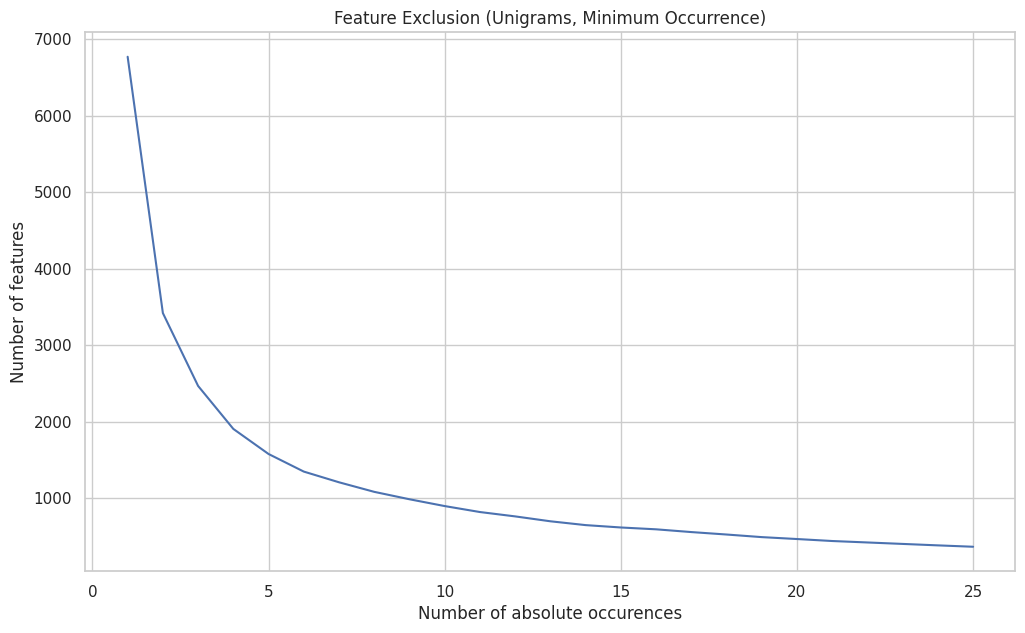

In [5]:
ax = sns.lineplot(y=length_features, x=range(1,26))
plt.xlabel("Number of absolute occurences")
plt.ylabel("Number of features")
plt.title("Feature Exclusion (Unigrams, Minimum Occurrence)")
plt.show()

In [6]:
length_features = []
for poop in range(1,26):
    vectorizer = TfidfVectorizer(stop_words=custom_stop_words, min_df=poop, ngram_range=(1,2))
    all = vectorizer.fit_transform(dataset.data)
    length = len(vectorizer.get_feature_names_out())
    length_features.append(length)
print(length_features)

[46234, 7913, 4241, 2871, 2193, 1787, 1547, 1355, 1206, 1075, 970, 894, 809, 750, 703, 668, 622, 588, 549, 516, 482, 459, 436, 415, 391]


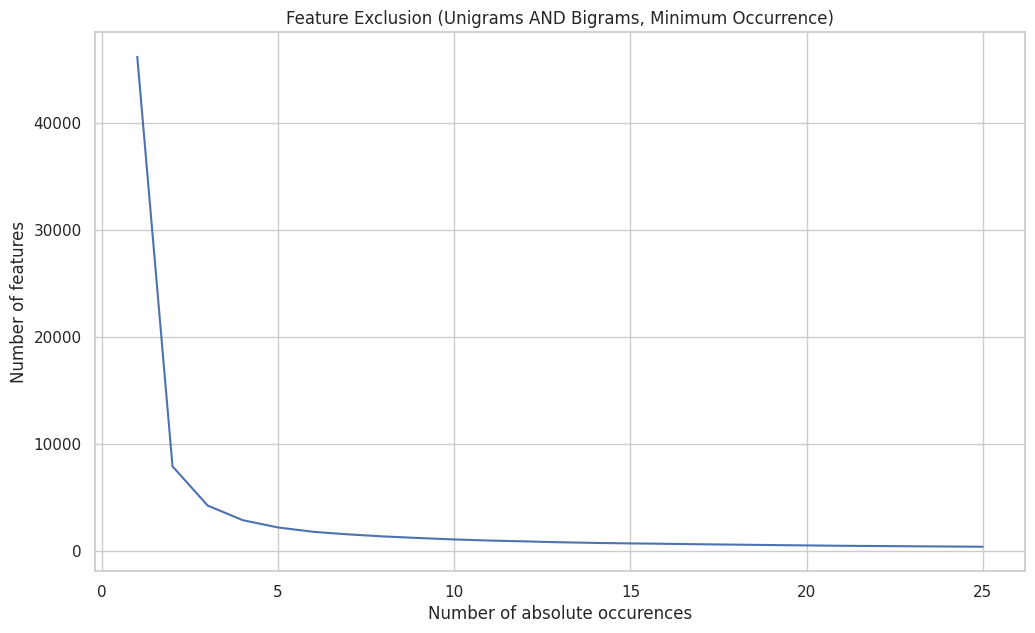

In [7]:
ax = sns.lineplot(y=length_features, x=range(1,26))
plt.xlabel("Number of absolute occurences")
plt.ylabel("Number of features")
plt.title("Feature Exclusion (Unigrams AND Bigrams, Minimum Occurrence)")
plt.show()

In [8]:
dataset

{'data': ["The Omni Chicago Hotel I am a business woman who travels a great deal out of a month, therefore, my accommodations must meet the highest standards. I was booked for a stay at The Omni Chicago Hotel, located in what is referred to as ' The Magnificent Mile ' in the greater Chicago area. ' Magnificent ', it was! The beautifully red-bricked sky scraper was indeed a breath- taking sight and upon entrance, I had a felling of warmth from the very hospitable welcoming staff. I was impressed with the hotels special rates offered during prime business hours and the guest rooms ranged everything from ' The Presidential Suite to The Governors Suite '. I accepted a more humble room as I would not need to spend very much time there during the day. I did stay inside most nights and the amenities were more than satisfactory. I enjoyed the very spacious exercise room and afterwards, I would take a quick dip in the pool. I toured the hotel as my niece is planning her wedding and just so happ

In [9]:
# word frequency for ALL corpuses
import pandas as pd
c_vectorizer = CountVectorizer(stop_words=custom_stop_words)
all_words = c_vectorizer.fit_transform(dataset.data)
counts = pd.DataFrame(all_words.toarray(), columns=c_vectorizer.get_feature_names_out())
sorted_counts = counts.sum().sort_values(ascending=False)
print(sorted_counts)

hotel       1657
room        1292
chicago      776
stay         658
staff        408
            ... 
priciest       1
judge          1
pride          1
prides         1
ignore         1
Length: 6771, dtype: int64


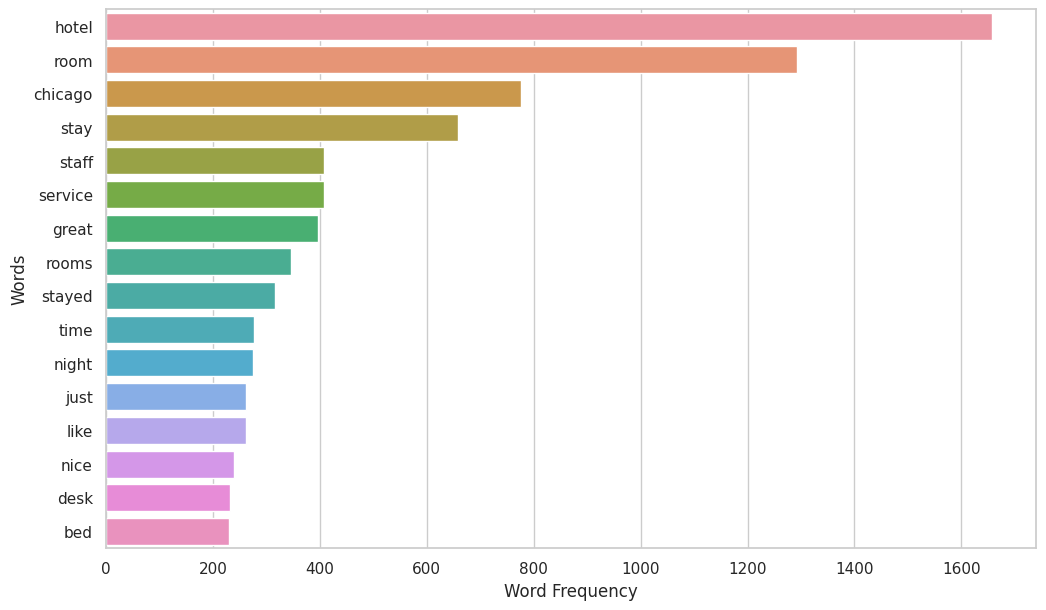

In [10]:
import seaborn as sns
limit = 16
custom_params = {'figure.figsize':(12,7)}
sns.set_theme(style="whitegrid", rc=custom_params)
ax = sns.barplot(y=sorted_counts.index[:limit], x=sorted_counts.values[:limit])
ax.set(xlabel='Word Frequency', ylabel='Words')
plt.show()

In [11]:
# Fit and test the models
mnb = MultinomialNB()
preds_mnb = mnb.fit(x_train_vec, y_train).predict(x_test_vec)
print("MNB correct predictions %d out of %d" % ((y_test == preds_mnb).sum(), x_test_vec.shape[0]))

loreg1 = LogisticRegression(solver='lbfgs')
preds_logreg1 = loreg1.fit(x_train_vec, y_train).predict(x_test_vec)
print("LReg-LBFGS correct predictions %d out of %d" % ((y_test == preds_logreg1).sum(), x_test_vec.shape[0]))

logreg2 = LogisticRegression(solver='liblinear')
preds_logreg2 = logreg2.fit(x_train_vec, y_train).predict(x_test_vec)
print(f"LReg-Liblinear correct predictions {(y_test == preds_logreg2).sum()} out of {x_test_vec.shape[0]}")

logreg3 = LogisticRegression(solver='saga')
preds_logreg3 = logreg3.fit(x_train_vec, y_train).predict(x_test_vec)
print(f"LReg-Saga correct predictions {(y_test == preds_logreg3).sum()} out of {x_test_vec.shape[0]}")

dectree = DecisionTreeClassifier()
preds_dectree = dectree.fit(x_train_vec, y_train).predict(x_test_vec)
print(f"Decision Tree correct predictions {(y_test == preds_dectree).sum()} out of {x_test_vec.shape[0]}")

rforest = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
preds_rforest = rforest.fit(x_train_vec, y_train).predict(x_test_vec)
print(f"Random Forest correct predictions {(y_test == preds_rforest).sum()} out of {len(y_test)}")

MNB correct predictions 153 out of 160
LReg-LBFGS correct predictions 154 out of 160
LReg-Liblinear correct predictions 154 out of 160
LReg-Saga correct predictions 154 out of 160
Decision Tree correct predictions 128 out of 160
Random Forest correct predictions 131 out of 160


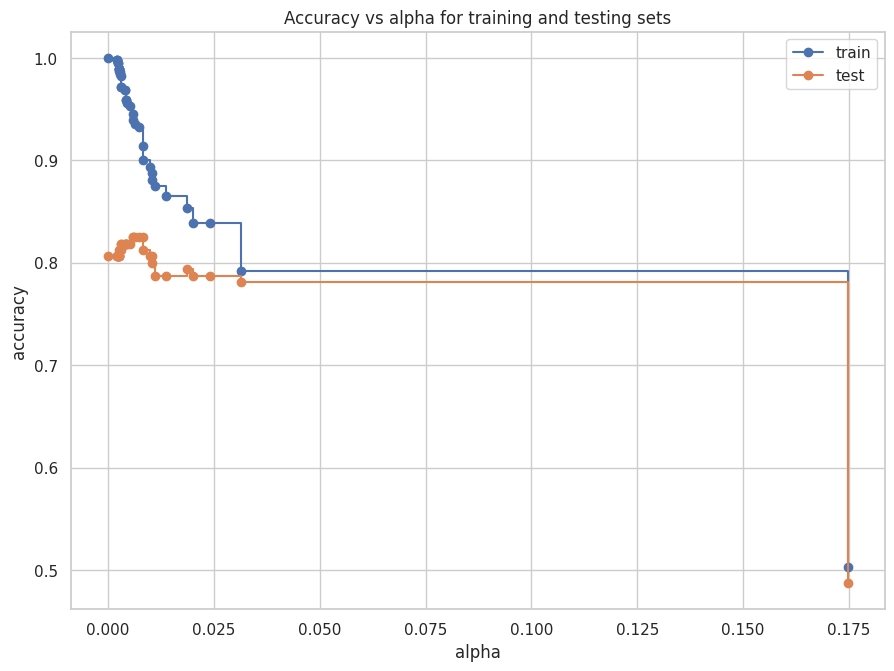

In [12]:
# Attempt to optimize the Decision Tree using Cost-Complexity Pruning technique
path = dectree.cost_complexity_pruning_path(x_train_vec, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# print(ccp_alphas)
# print(impurities)

dtrees = []
for ccp_alpha in ccp_alphas:
    dtr = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dtr.fit(x_train_vec, y_train)
    dtrees.append(dtr)
# print(f"Number of nodes in the last tree is: {dectrees[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}")

train_scores = [dtr.score(x_train_vec, y_train) for dtr in dtrees]
test_scores = [dtr.score(x_test_vec, y_test) for dtr in dtrees]

fig, ax = plt.subplots()
fig.set_size_inches(10.5, 7.5)
fig.set_dpi(100)
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# CONCLUSION: Accuracy optimizes at alpha 0.01. However, the score remains at ±52% so there is no noticeable 
# improvement achieved by the cost-complexity pruning, compared to the simple un-pruned tree.

In [13]:
# fake vs genuine - all probabilities are sorted
mnb_prob = mnb.feature_log_prob_[:,:]
# print(mnb_prob, mnb_prob.argsort()[::-1])

loreg_coef = loreg1.coef_
#print(loreg_coef, loreg_coef.argsort()[::-1])

# np.set_printoptions(threshold=sys.maxsize)
print("All Feature Words:\n", vectorizer.get_feature_names_out())
print(pd.DataFrame(vectorizer.get_feature_names_out()).describe())
range = 25

# fake_mnb = mnb_prob[0, :].argsort()[::-1]
# print("\nImportant Words - Fake MNB:\n", np.take(vectorizer.get_feature_names_out(), fake_mnb[:range]))
loreg = loreg_coef[0, :].argsort()[::-1]
print("\nImportant Words - Logistic Regression:\n", np.take(vectorizer.get_feature_names_out(), loreg[:range]))

# true_mnb = mnb_prob[1, :].argsort()[::-1]
# true_loreg = loreg_coef[1, :].argsort()[::-1]
# print("\nImportant Words - True MNB:\n", np.take(vectorizer.get_feature_names_out(), true_mnb[:range]))
# print("\nImportant Words - True LoReg:\n", np.take(vectorizer.get_feature_names_out(), true_loreg[:range]))

All Feature Words:
 ['10' '15' '20' '24' '30' 'able' 'absolutely' 'access' 'accommodations'
 'actually' 'air' 'allegro' 'amalfi' 'amazing' 'ambassador' 'amenities'
 'area' 'arrival' 'arrived' 'ask' 'asked' 'atmosphere' 'attractions'
 'available' 'ave' 'away' 'bad' 'bar' 'bathroom' 'beautiful' 'bed' 'beds'
 'best' 'better' 'big' 'bit' 'book' 'booked' 'breakfast' 'bring' 'broken'
 'brought' 'building' 'business' 'called' 'came' 'car' 'card' 'care'
 'center' 'charge' 'charged' 'check' 'checked' 'checking' 'chicago'
 'chicago hotel' 'choice' 'city' 'clean' 'close' 'coffee' 'come'
 'comfortable' 'coming' 'completely' 'complimentary' 'concierge'
 'conference' 'conrad' 'construction' 'cool' 'couldn' 'customer'
 'customer service' 'day' 'days' 'deal' 'decided' 'decor' 'definitely'
 'definitely stay' 'delicious' 'desk' 'desk staff' 'did' 'didn'
 'different' 'dining' 'dinner' 'dirty' 'disappointed' 'distance' 'does'
 'don' 'door' 'doors' 'double' 'downtown' 'downtown chicago' 'east' 'easy'
 'eat

IndexError: index 5448 is out of bounds for axis 0 with size 391

In [ ]:
sorted_idx = rforest.feature_importances_.argsort()[::-1]
f_words = np.take(vectorizer.get_feature_names_out(), sorted_idx)
print("Sorted Forest", sorted_idx)
print(f_words)
ax = sns.barplot(y=f_words[:20], x=rforest.feature_importances_[sorted_idx][:20])
ax.set_title("Ah!")
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    dectree, x_test_vec.toarray(), y_test, n_repeats=10, random_state=0, n_jobs=2
)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
from sklearn import tree
# plot tree
plt.figure(figsize=(30,16))  # set plot size (denoted in inches)
tree.plot_tree(dectree, fontsize=6)
plt.show()

In [ ]:
def run_cross_validation(nfolds, ngram=1):
    tf_vectorizer = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(ngram, ngram))
    x_train_vec = tf_vectorizer.fit_transform(dataset.data)
    y_train_vec = dataset.target

    mnbayes = MultinomialNB()
    logreg = LogisticRegression(solver='lbfgs')
    logreg2 = LogisticRegression(solver='liblinear')
    logreg3 = LogisticRegression(solver='saga')
    dtree = DecisionTreeClassifier()
    ranForest = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
    
    # Naive Bayes
    bayes_acc = cross_val_score(mnbayes, x_train_vec, y_train_vec, cv=nfolds, scoring='accuracy', n_jobs=-1).mean()
    bayes_prec = 0 #cross_val_score(mnbayes, x_train_vec, y_train_vec, cv=nfolds, scoring='precision').mean()
    bayes_rec = 0 #cross_val_score(mnbayes, x_train_vec, y_train_vec, cv=nfolds, scoring='recall').mean()
    
    #Logistic regression
    lg_acc = cross_val_score(logreg, x_train_vec, y_train_vec, cv=nfolds, scoring='accuracy', n_jobs=-1).mean()
    lg_prec = 0 #cross_val_score(logreg, x_train_vec, y_train_vec, cv=nfolds, scoring='precision').mean()
    lg_rec = 0 #cross_val_score(logreg, x_train_vec, y_train_vec, cv=nfolds, scoring='recall').mean()
    
    lg2_acc = cross_val_score(logreg2, x_train_vec, y_train_vec, cv=nfolds, scoring='accuracy', n_jobs=-1).mean()
    lg2_prec = 0 #cross_val_score(logreg2, x_train_vec, y_train_vec, cv=nfolds, scoring='precision').mean()
    lg2_rec = 0 #cross_val_score(logreg2, x_train_vec, y_train_vec, cv=nfolds, scoring='recall').mean()
    
    lg3_acc = cross_val_score(logreg3, x_train_vec, y_train_vec, cv=nfolds, scoring='accuracy', n_jobs=-1).mean()
    lg3_prec = 0 #cross_val_score(logreg3, x_train_vec, y_train_vec, cv=nfolds, scoring='precision').mean()
    lg3_rec = 0 #cross_val_score(logreg3, x_train_vec, y_train_vec, cv=nfolds, scoring='recall').mean()
            
    dt_acc = cross_val_score(dtree, x_train_vec, y_train_vec, cv=nfolds, scoring='accuracy', n_jobs=-1).mean()
    dt_prec = 0 #cross_val_score(dtree, x_train_vec, y_train_vec, cv=nfolds, scoring='precision').mean()
    dt_rec = 0 #cross_val_score(dtree, x_train_vec, y_train_vec, cv=nfolds, scoring='recall').mean()
    
    ranForest_acc = cross_val_score(ranForest, x_train_vec, y_train_vec, cv=nfolds, scoring='accuracy', n_jobs=-1).mean()
    ranForest_prec = 0 #cross_val_score(ranForest, x_train_vec, y_train_vec, cv=nfolds, scoring='precision').mean()
    ranForest_rec = 0 #cross_val_score(ranForest, x_train_vec, y_train_vec, cv=nfolds, scoring='recall').mean()
    
    print(f'         Model                         | Accuracy | Precision | Recall')
    print(f'Naive Bayes                            | {round(bayes_acc, 3)}    | {round(bayes_prec, 3)}    | {round(bayes_rec, 3)}')
    print(f'Logistic Regression - LBFGS solver     | {round(lg_acc, 3)}    | {round(lg_prec, 3)}    | {round(lg_rec, 3)}')
    print(f'Logistic Regression - Liblinear solver | {round(lg2_acc, 3)}    | {round(lg2_prec, 3)}    | {round(lg2_rec, 3)}')
    print(f'Logistic Regression - Saga solver      | {round(lg3_acc, 3)}    | {round(lg3_prec, 3)}    | {round(lg3_rec, 3)}')
    print(f'Decision Tree                          | {round(dt_acc, 3)}    | {round(dt_prec, 3)}    | {round(dt_rec, 3)}')
    print(f'Random Forest                          | {round(ranForest_acc, 3)}    | {round(ranForest_prec, 3)}    | {round(ranForest_rec, 3)}')

In [ ]:
print('===== UNIGRAM, 5 folds cv =====')
run_cross_validation(nfolds=5, ngram=1)
print('===== UNIGRAM, 10 folds cv =====')
run_cross_validation(nfolds=10, ngram=1)
print('\n===== BIGRAM, 5 folds cv =====')
run_cross_validation(nfolds=5, ngram=2)
print('\n===== BIGRAM, 10 folds cv =====')
run_cross_validation(nfolds=10, ngram=2)